In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [33]:
df = pd.read_csv("C:\\Dell\\Dataset\\CreditWorthiness.csv")

In [34]:
df.head(5)

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,...,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,all settled till now,Business,13790,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,...,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,dues not paid earlier,electronics,15250,no savings account,more than 7 years,4,single male,"yes, guarantor",...,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,none taken/all settled,Business,19410,Rs. < 1000,more than 7 years,4,single male,no one,...,Unknown,61,none,free,1,"employed either in management, self or in high...",1,yes,no,bad
3,0 <= Rs. < 2000,48,none taken/all settled,Business,144090,Rs. < 1000,1 to 4 years,2,single male,no one,...,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,all settled till now,electronics,31690,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,...,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good


In [35]:
df.shape

(1000, 21)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cbal         1000 non-null   object
 1   Cdur         1000 non-null   int64 
 2   Chist        1000 non-null   object
 3   Cpur         1000 non-null   object
 4   Camt         1000 non-null   int64 
 5   Sbal         1000 non-null   object
 6   Edur         1000 non-null   object
 7   InRate       1000 non-null   int64 
 8   MSG          1000 non-null   object
 9   Oparties     1000 non-null   object
 10  Rdur         1000 non-null   object
 11  Prop         1000 non-null   object
 12  age          1000 non-null   int64 
 13  inPlans      1000 non-null   object
 14  Htype        1000 non-null   object
 15  NumCred      1000 non-null   int64 
 16  JobType      1000 non-null   object
 17  Ndepend      1000 non-null   int64 
 18  telephone    1000 non-null   object
 19  foreign      1000 non-null  

In [37]:
df.isnull().sum()

Cbal           0
Cdur           0
Chist          0
Cpur           0
Camt           0
Sbal           0
Edur           0
InRate         0
MSG            0
Oparties       0
Rdur           0
Prop           0
age            0
inPlans        0
Htype          0
NumCred        0
JobType        0
Ndepend        0
telephone      0
foreign        0
creditScore    0
dtype: int64

In [38]:
df.describe()

,Cdur,Camt,InRate,age,NumCred,Ndepend
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,32592.58000,2.973000,35.546000,1.407000,1.155000
std,12.058814,28227.36876,1.118715,11.375469,0.577654,0.362086
min,4.000000,2380.00000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,13535.00000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,23075.00000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,39602.50000,4.000000,42.000000,2.000000,1.000000
max,72.000000,184120.00000,4.000000,75.000000,4.000000,2.000000


In [39]:
df.corr()

,Cdur,Camt,InRate,age,NumCred,Ndepend
Cdur,1.000000,0.624984,0.074749,-0.036136,-0.011284,-0.023834
Camt,0.624984,1.000000,-0.271316,0.032716,0.020795,0.017142
InRate,0.074749,-0.271316,1.000000,0.058266,0.021669,-0.071207
age,-0.036136,0.032716,0.058266,1.000000,0.149254,0.118201
NumCred,-0.011284,0.020795,0.021669,0.149254,1.000000,0.109667
Ndepend,-0.023834,0.017142,-0.071207,0.118201,0.109667,1.000000


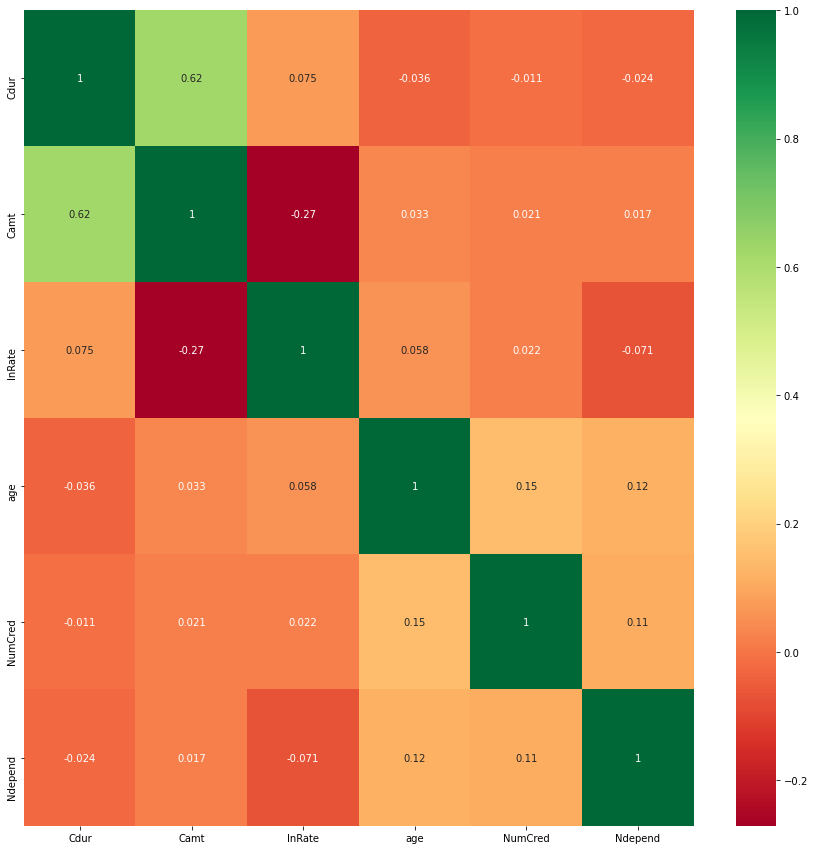

In [40]:
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
graph=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

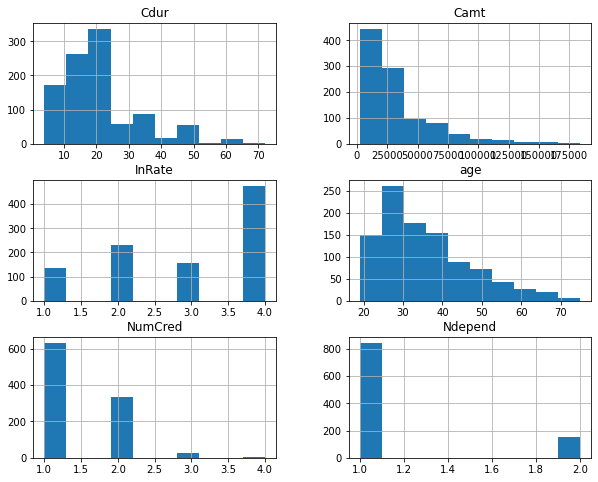

In [41]:
df.hist(figsize = (10,8))
plt.show()

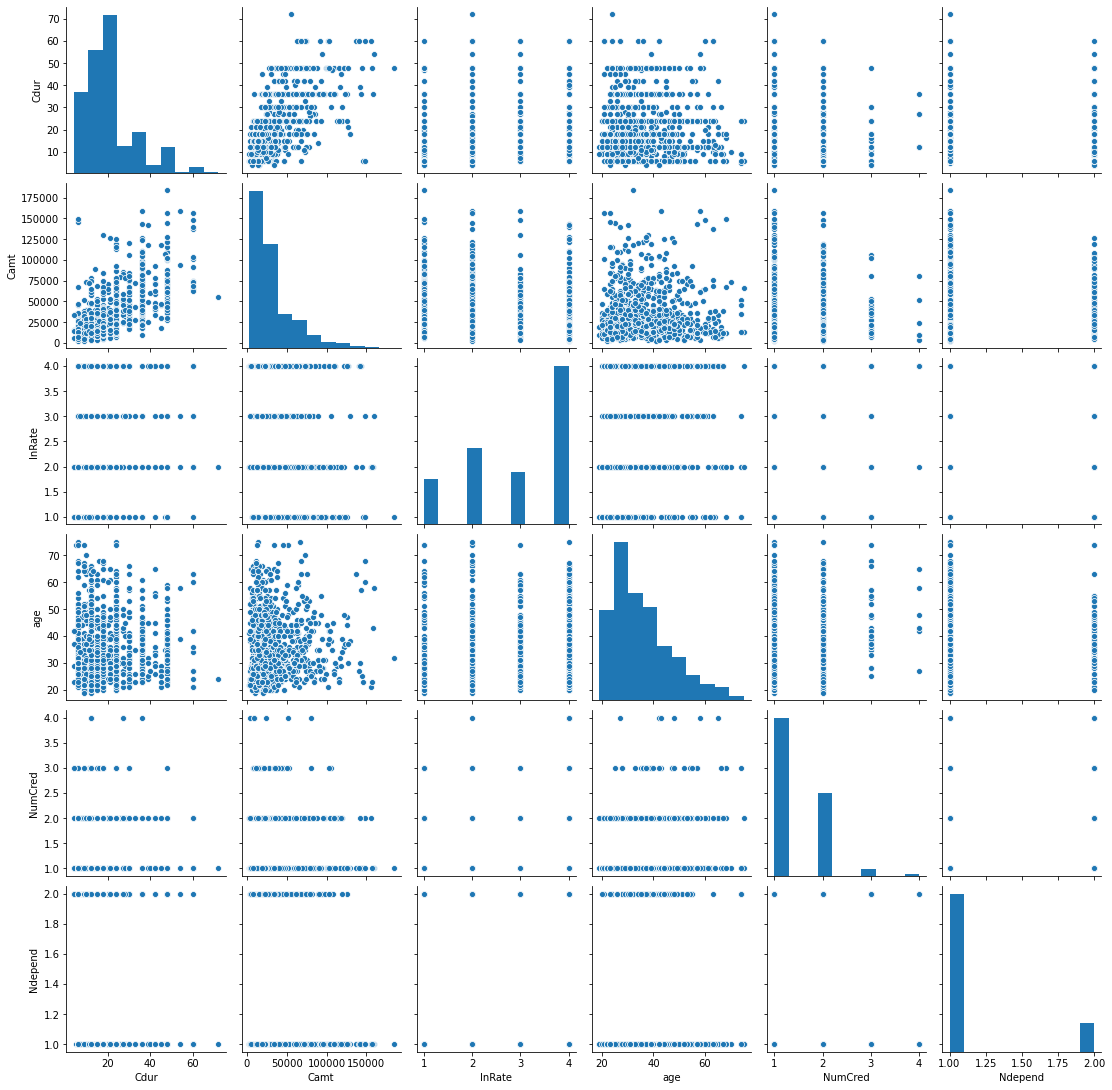

In [42]:
sns.pairplot(df)

In [43]:
final_df = pd.get_dummies(df,drop_first=True)

In [44]:
final_df.shape

(1000, 50)

In [45]:
final_df.head(5)

,Cdur,Camt,InRate,age,NumCred,Ndepend,Cbal_0 <= Rs. < 2000,Cbal_Rs. >=2000,Cbal_no checking account,Chist_all settled till now,...,inPlans_none,inPlans_stores,Htype_own,Htype_pays rent,JobType_employee with official position,JobType_non resident either unemployed or unskilled,JobType_resident unskilled,telephone_yes,foreign_yes,creditScore_good
0,9,13790,2,27,1,1,1,0,0,1,...,0,0,1,0,1,0,0,1,0,1
1,15,15250,4,50,2,1,1,0,0,0,...,1,0,1,0,1,0,0,1,0,1
2,36,19410,4,61,1,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,48,144090,2,25,1,1,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
4,24,31690,4,26,1,1,0,0,1,1,...,1,0,1,0,1,0,0,1,0,1


In [47]:
X = final_df.drop(['creditScore_good'], axis=1)
y = final_df['creditScore_good']

In [48]:
X.columns

Index(['Cdur', 'Camt', 'InRate', 'age', 'NumCred', 'Ndepend',
       'Cbal_0 <= Rs. < 2000', 'Cbal_Rs. >=2000', 'Cbal_no checking account',
       'Chist_all settled till now', 'Chist_dues not paid earlier',
       'Chist_none taken/all settled', 'Cpur_domestic needs', 'Cpur_education',
       'Cpur_electronics', 'Cpur_furniture', 'Cpur_miscellaneous',
       'Cpur_new vehicle', 'Cpur_renovation', 'Cpur_retaining',
       'Cpur_second hand vehicle', 'Sbal_5000 <= Rs. < 10,000',
       'Sbal_Rs. < 1000', 'Sbal_Rs. >= 10,000', 'Sbal_no savings account',
       'Edur_4 to 7 years', 'Edur_less than 1 year', 'Edur_more than 7 years',
       'Edur_not employed', 'MSG_divorced or separated or married female',
       'MSG_married or widowed male', 'MSG_single male',
       'Oparties_yes, co-applicant', 'Oparties_yes, guarantor',
       'Rdur_2 to 3 years', 'Rdur_less than a year', 'Rdur_more than 3 years',
       'Prop_Unknown', 'Prop_life insurance/building society',
       'Prop_real estate'

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [53]:
# For Scaling

from sklearn import preprocessing

ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=10)

In [50]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_predict = model1.predict(X_test)

In [51]:
model1_score = model1.score(X_test, y_test)
print(model1_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.66
[[  4 101]
 [  1 194]]
              precision    recall  f1-score   support

           0       0.80      0.04      0.07       105
           1       0.66      0.99      0.79       195

    accuracy                           0.66       300
   macro avg       0.73      0.52      0.43       300
weighted avg       0.71      0.66      0.54       300



In [54]:
# With Scaling

model1a = LogisticRegression()
model1a.fit(ZX_train, y_train)
y_predict = model1a.predict(ZX_test)
model1a_score = model1a.score(ZX_test, y_test)
print(model1a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.77
[[ 59  46]
 [ 23 172]]
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       105
           1       0.79      0.88      0.83       195

    accuracy                           0.77       300
   macro avg       0.75      0.72      0.73       300
weighted avg       0.76      0.77      0.76       300



In [64]:
from sklearn.neighbors import KNeighborsClassifier

KNN_a= KNeighborsClassifier(n_neighbors= 21, weights = 'distance' )
KNN_a.fit(X_train, y_train)
y_predict = KNN_a.predict(X_test)
KNN_a_score = KNN_a.score(X_test, y_test)
print(KNN_a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.64
[[ 22  83]
 [ 25 170]]
              precision    recall  f1-score   support

           0       0.47      0.21      0.29       105
           1       0.67      0.87      0.76       195

    accuracy                           0.64       300
   macro avg       0.57      0.54      0.52       300
weighted avg       0.60      0.64      0.59       300



In [65]:
KNN_a= KNeighborsClassifier(n_neighbors= 21, weights = 'distance' )
KNN_a.fit(ZX_train, y_train)
y_predict = KNN_a.predict(ZX_test)
KNN_a_score = KNN_a.score(ZX_test, y_test)
print(KNN_a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.6933333333333334
[[ 19  86]
 [  6 189]]
              precision    recall  f1-score   support

           0       0.76      0.18      0.29       105
           1       0.69      0.97      0.80       195

    accuracy                           0.69       300
   macro avg       0.72      0.58      0.55       300
weighted avg       0.71      0.69      0.63       300



In [66]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_predict = model1.predict(X_test)

In [68]:
model1_score = model1.score(X_test, y_test)
print(model1_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.77
[[ 59  46]
 [ 23 172]]
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       105
           1       0.79      0.88      0.83       195

    accuracy                           0.77       300
   macro avg       0.75      0.72      0.73       300
weighted avg       0.76      0.77      0.76       300



In [73]:
KNN_a= KNeighborsClassifier(n_neighbors= 24, weights = 'distance' )
KNN_a.fit(X_train, y_train)
y_predict = KNN_a.predict(X_test)
KNN_a_score = KNN_a.score(X_test, y_test)
print(KNN_a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.69
[[ 19  86]
 [  7 188]]
              precision    recall  f1-score   support

           0       0.73      0.18      0.29       105
           1       0.69      0.96      0.80       195

    accuracy                           0.69       300
   macro avg       0.71      0.57      0.55       300
weighted avg       0.70      0.69      0.62       300

